# Interactive two population network example

To run this interactive Jupyter Notebook, please click on the rocket icon 🚀 in the top panel. For more information, please see {ref}`how to use this documentation <userdocs:usage:jupyterbooks>`. Please uncomment the line below if you use the Google Colab. (It does not include these packages by default).

In [1]:
#%pip install pyneuroml neuromllite NEURON

In [2]:
#!/usr/bin/env python3
"""
Create a simple network with two populations.
"""

import random
import numpy as np

from neuroml.utils import component_factory
from pyneuroml import pynml
from pyneuroml.lems import LEMSSimulation
import neuroml.writers as writers

## Declaring the NeuroML model

### Create a NeuroML document

In [3]:
nml_doc = component_factory("NeuroMLDocument", id="IzNet")

### Declare the Izhikevich cell and add it to the model document

In [4]:
iz0 = nml_doc.add(
    "Izhikevich2007Cell",
    id="iz2007RS0",
    v0="-60mV",
    C="100pF",
    k="0.7nS_per_mV",
    vr="-60mV",
    vt="-40mV",
    vpeak="35mV",
    a="0.03per_ms",
    b="-2nS",
    c="-50.0mV",
    d="100pA",
)
# Inspect the component, also show all members:
iz0.info(True)

Izhikevich2007Cell -- Cell based on the modified Izhikevich model in Izhikevich 2007, Dynamical systems in neuroscience, MIT Press

Please see the NeuroML standard schema documentation at https://docs.neuroml.org/Userdocs/NeuroMLv2.html for more information.

Valid members for Izhikevich2007Cell are:
* a (class: Nml2Quantity_pertime, Required)
	* Contents ('ids'/<objects>): 0.03per_ms

* C (class: Nml2Quantity_capacitance, Required)
	* Contents ('ids'/<objects>): 100pF

* annotation (class: Annotation, Optional)
* b (class: Nml2Quantity_conductance, Required)
	* Contents ('ids'/<objects>): -2nS

* metaid (class: MetaId, Optional)
* c (class: Nml2Quantity_voltage, Required)
	* Contents ('ids'/<objects>): -50.0mV

* d (class: Nml2Quantity_current, Required)
	* Contents ('ids'/<objects>): 100pA

* neuro_lex_id (class: NeuroLexId, Optional)
* v0 (class: Nml2Quantity_voltage, Required)
	* Contents ('ids'/<objects>): -60mV

* properties (class: Property, Optional)
* k (class: Nml2Quantity_co

"Izhikevich2007Cell -- Cell based on the modified Izhikevich model in Izhikevich 2007, Dynamical systems in neuroscience, MIT Press\n\nPlease see the NeuroML standard schema documentation at https://docs.neuroml.org/Userdocs/NeuroMLv2.html for more information.\n\nValid members for Izhikevich2007Cell are:\n* a (class: Nml2Quantity_pertime, Required)\n\t* Contents ('ids'/<objects>): 0.03per_ms\n\n* C (class: Nml2Quantity_capacitance, Required)\n\t* Contents ('ids'/<objects>): 100pF\n\n* annotation (class: Annotation, Optional)\n* b (class: Nml2Quantity_conductance, Required)\n\t* Contents ('ids'/<objects>): -2nS\n\n* metaid (class: MetaId, Optional)\n* c (class: Nml2Quantity_voltage, Required)\n\t* Contents ('ids'/<objects>): -50.0mV\n\n* d (class: Nml2Quantity_current, Required)\n\t* Contents ('ids'/<objects>): 100pA\n\n* neuro_lex_id (class: NeuroLexId, Optional)\n* v0 (class: Nml2Quantity_voltage, Required)\n\t* Contents ('ids'/<objects>): -60mV\n\n* properties (class: Property, Opti

### Declare the Synapse and add it to the model document

In [5]:
syn0 = nml_doc.add(
    "ExpOneSynapse", id="syn0", gbase="65nS", erev="0mV", tau_decay="3ms"
)

In [6]:
nml_doc.info(True)

Please see the NeuroML standard schema documentation at https://docs.neuroml.org/Userdocs/NeuroMLv2.html for more information.

Valid members for NeuroMLDocument are:
* compound_inputs (class: CompoundInput, Optional)
* compound_input_dls (class: CompoundInputDL, Optional)
* includes (class: IncludeType, Optional)
* voltage_clamps (class: VoltageClamp, Optional)
* extracellular_properties (class: ExtracellularProperties, Optional)
* voltage_clamp_triples (class: VoltageClampTriple, Optional)
* intracellular_properties (class: IntracellularProperties, Optional)
* spike_arrays (class: SpikeArray, Optional)
* morphology (class: Morphology, Optional)
* timed_synaptic_inputs (class: TimedSynapticInput, Optional)
* ion_channel (class: IonChannel, Optional)
* spike_generators (class: SpikeGenerator, Optional)
* ion_channel_hhs (class: IonChannelHH, Optional)
* spike_generator_randoms (class: SpikeGeneratorRandom, Optional)
* ion_channel_v_shifts (class: IonChannelVShift, Optional)
* spike_gen

"Please see the NeuroML standard schema documentation at https://docs.neuroml.org/Userdocs/NeuroMLv2.html for more information.\n\nValid members for NeuroMLDocument are:\n* compound_inputs (class: CompoundInput, Optional)\n* compound_input_dls (class: CompoundInputDL, Optional)\n* includes (class: IncludeType, Optional)\n* voltage_clamps (class: VoltageClamp, Optional)\n* extracellular_properties (class: ExtracellularProperties, Optional)\n* voltage_clamp_triples (class: VoltageClampTriple, Optional)\n* intracellular_properties (class: IntracellularProperties, Optional)\n* spike_arrays (class: SpikeArray, Optional)\n* morphology (class: Morphology, Optional)\n* timed_synaptic_inputs (class: TimedSynapticInput, Optional)\n* ion_channel (class: IonChannel, Optional)\n* spike_generators (class: SpikeGenerator, Optional)\n* ion_channel_hhs (class: IonChannelHH, Optional)\n* spike_generator_randoms (class: SpikeGeneratorRandom, Optional)\n* ion_channel_v_shifts (class: IonChannelVShift, Opt

In [7]:
print(nml_doc.summary())

*******************************************************
* NeuroMLDocument: IzNet
*
*  ExpOneSynapse: ['syn0']
*  Izhikevich2007Cell: ['iz2007RS0']
*
*******************************************************


### Declare a Network and add it to the model document

In [8]:
net = nml_doc.add("Network", id="IzNet", validate=False)

### Create two populations

In [9]:
# create the first population
size0 = 5
pop0 = component_factory("Population", id="IzPop0", component=iz0.id, size=size0, type="population")
# Set optional color property. Note: used later when generating plots
pop0.add("Property", tag="color", value="0 0 .8")
net.add(pop0)

# create the second population
size1 = 5
pop1 = component_factory("Population", id="IzPop1", component=iz0.id, size=size1, type="population")
pop1.add("Property", tag="color", value=".8 0 0")
net.add(pop1)

In [10]:
net.validate()

### Declare projections

In [11]:
# create a projection from one population to another
proj = net.add(
    "Projection",
    id="proj",
    presynaptic_population=pop0.id,
    postsynaptic_population=pop1.id,
    synapse=syn0.id,
)

### Add the projections between populations and the external inputs

In [12]:
random.seed(123)
prob_connection = 0.8
count = 0
for pre in range(0, size0):
    # pulse generator as explicit stimulus
    pg = nml_doc.add(
        "PulseGenerator",
        id="pg_%i" % pre,
        delay="0ms",
        duration="10000ms",
        amplitude="%f nA" % (0.1 + 0.1 * random.random()),
    )

    exp_input = net.add(
        "ExplicitInput", target="%s[%i]" % (pop0.id, pre), input=pg.id
    )

    # synapses between populations
    for post in range(0, size1):
        if random.random() <= prob_connection:
            syn = proj.add(
                "Connection",
                id=count,
                pre_cell_id="../%s[%i]" % (pop0.id, pre),
                post_cell_id="../%s[%i]" % (pop1.id, post),
            )
            count += 1

In [13]:
nml_doc.info(True)

Please see the NeuroML standard schema documentation at https://docs.neuroml.org/Userdocs/NeuroMLv2.html for more information.

Valid members for NeuroMLDocument are:
* compound_inputs (class: CompoundInput, Optional)
* compound_input_dls (class: CompoundInputDL, Optional)
* includes (class: IncludeType, Optional)
* voltage_clamps (class: VoltageClamp, Optional)
* extracellular_properties (class: ExtracellularProperties, Optional)
* voltage_clamp_triples (class: VoltageClampTriple, Optional)
* intracellular_properties (class: IntracellularProperties, Optional)
* spike_arrays (class: SpikeArray, Optional)
* morphology (class: Morphology, Optional)
* timed_synaptic_inputs (class: TimedSynapticInput, Optional)
* ion_channel (class: IonChannel, Optional)
* spike_generators (class: SpikeGenerator, Optional)
* ion_channel_hhs (class: IonChannelHH, Optional)
* spike_generator_randoms (class: SpikeGeneratorRandom, Optional)
* ion_channel_v_shifts (class: IonChannelVShift, Optional)
* spike_gen

"Please see the NeuroML standard schema documentation at https://docs.neuroml.org/Userdocs/NeuroMLv2.html for more information.\n\nValid members for NeuroMLDocument are:\n* compound_inputs (class: CompoundInput, Optional)\n* compound_input_dls (class: CompoundInputDL, Optional)\n* includes (class: IncludeType, Optional)\n* voltage_clamps (class: VoltageClamp, Optional)\n* extracellular_properties (class: ExtracellularProperties, Optional)\n* voltage_clamp_triples (class: VoltageClampTriple, Optional)\n* intracellular_properties (class: IntracellularProperties, Optional)\n* spike_arrays (class: SpikeArray, Optional)\n* morphology (class: Morphology, Optional)\n* timed_synaptic_inputs (class: TimedSynapticInput, Optional)\n* ion_channel (class: IonChannel, Optional)\n* spike_generators (class: SpikeGenerator, Optional)\n* ion_channel_hhs (class: IonChannelHH, Optional)\n* spike_generator_randoms (class: SpikeGeneratorRandom, Optional)\n* ion_channel_v_shifts (class: IonChannelVShift, Opt

In [14]:
print(nml_doc.summary())

*******************************************************
* NeuroMLDocument: IzNet
*
*  ExpOneSynapse: ['syn0']
*  Izhikevich2007Cell: ['iz2007RS0']
*  PulseGenerator: ['pg_0', 'pg_1', 'pg_2', 'pg_3', 'pg_4']
*
*  Network: IzNet
*
*   10 cells in 2 populations 
*     Population: IzPop0 with 5 components of type iz2007RS0
*       Properties: color=0 0 .8; 
*     Population: IzPop1 with 5 components of type iz2007RS0
*       Properties: color=.8 0 0; 
*
*   20 connections in 1 projections 
*     Projection: proj from IzPop0 to IzPop1, synapse: syn0
*       20 connections: [(Connection 0: 0 -> 0), ...]
*
*   0 inputs in 0 input lists 
*
*   5 explicit inputs (outside of input lists)
*     Explicit Input of type pg_0 to IzPop0(cell 0), destination: unspecified
*     Explicit Input of type pg_1 to IzPop0(cell 1), destination: unspecified
*     Explicit Input of type pg_2 to IzPop0(cell 2), destination: unspecified
*     Explicit Input of type pg_3 to IzPop0(cell 3), destination: unspecified
*

### Write the NeuroML model to a NeuroML file and validate it

In [15]:
nml_file = 'izhikevich2007_network.nml'
writers.NeuroMLWriter.write(nml_doc, nml_file)

print("Written network file to: " + nml_file)
pynml.validate_neuroml2(nml_file)

pyNeuroML >>> INFO - Executing: (java -Xmx400M  -jar  "/home/asinha/Documents/02_Code/00_mine/NeuroML/documentation/.venv/lib/python3.10/site-packages/pyneuroml/lib/jNeuroML-0.12.0-jar-with-dependencies.jar" -validate "izhikevich2007_network.nml" ) in directory: .


Written network file to: izhikevich2007_network.nml


pyNeuroML >>> INFO - Command completed. Output: 
  jNeuroML >>   jNeuroML v0.12.0
  jNeuroML >>  Validating: /home/asinha/Documents/02_Code/00_mine/NeuroML/documentation/source/Userdocs/NML2_examples/izhikevich2007_network.nml
  jNeuroML >>  Valid against schema and all tests
  jNeuroML >>  No warnings
  jNeuroML >>  
  jNeuroML >>  Validated 1 files: All valid and no warnings
  jNeuroML >>  
  jNeuroML >>  


True

## Simulating the model
### Create a simulation instance of the model

In [16]:
simulation_id = "example_izhikevich2007network_sim"
simulation = LEMSSimulation(sim_id=simulation_id,
                            duration=1000, dt=0.1, simulation_seed=123)
simulation.assign_simulation_target(net.id)
simulation.include_neuroml2_file(nml_file)

pyNeuroML >>> INFO - Loading NeuroML2 file: /home/asinha/Documents/02_Code/00_mine/NeuroML/documentation/source/Userdocs/NML2_examples/izhikevich2007_network.nml


### Define the output file to store spikes

In [17]:
simulation.create_event_output_file(
    "pop0", "%s.0.spikes.dat" % simulation_id, format='ID_TIME'
)
for pre in range(0, size0):
    simulation.add_selection_to_event_output_file(
        "pop0", pre, 'IzPop0[{}]'.format(pre), 'spike')

simulation.create_event_output_file(
    "pop1", "%s.1.spikes.dat" % simulation_id, format='ID_TIME'
)
for pre in range(0, size1):
    simulation.add_selection_to_event_output_file(
        "pop1", pre, 'IzPop1[{}]'.format(pre), 'spike')

## Save the simulation to a file

In [18]:
lems_simulation_file = simulation.save_to_file()

## Run the simulation using jNeuroML

In [19]:
pynml.run_lems_with_jneuroml_neuron(
    lems_simulation_file, max_memory="2G", nogui=True, plot=False
)

pyNeuroML >>> INFO - Loading LEMS file: LEMS_example_izhikevich2007network_sim.xml and running with jNeuroML_NEURON
pyNeuroML >>> INFO - Executing: (java -Xmx2G  -Djava.awt.headless=true -jar  "/home/asinha/Documents/02_Code/00_mine/NeuroML/documentation/.venv/lib/python3.10/site-packages/pyneuroml/lib/jNeuroML-0.12.0-jar-with-dependencies.jar"  "LEMS_example_izhikevich2007network_sim.xml"  -neuron -run -compile -nogui -I '') in directory: .
pyNeuroML >>> INFO - Command completed. Output: 
  jNeuroML >>   jNeuroML v0.12.0
  jNeuroML >>  (INFO) Reading from: /home/asinha/Documents/02_Code/00_mine/NeuroML/documentation/source/Userdocs/NML2_examples/LEMS_example_izhikevich2007network_sim.xml
  jNeuroML >>  (INFO) Creating NeuronWriter to output files to /home/asinha/Documents/02_Code/00_mine/NeuroML/documentation/source/Userdocs/NML2_examples
  jNeuroML >>  (INFO) Adding simulation Component(id=example_izhikevich2007network_sim type=Simulation) of network/component: IzNet (Type: network)


True

## Plot the recorded data

pyNeuroML >>> INFO - Generating plot: Spike times
/home/asinha/Documents/02_Code/00_mine/NeuroML/documentation/.venv/lib64/python3.10/site-packages/pyneuroml/plot/Plot.py:174: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(
pyNeuroML >>> INFO - Saving image to /home/asinha/Documents/02_Code/00_mine/NeuroML/documentation/source/Userdocs/NML2_examples/example_izhikevich2007network_sim-spikes.png of plot: Spike times
pyNeuroML >>> INFO - Saved image to example_izhikevich2007network_sim-spikes.png of plot: Spike times


<AxesSubplot: xlabel='time (s)', ylabel='cell ID'>

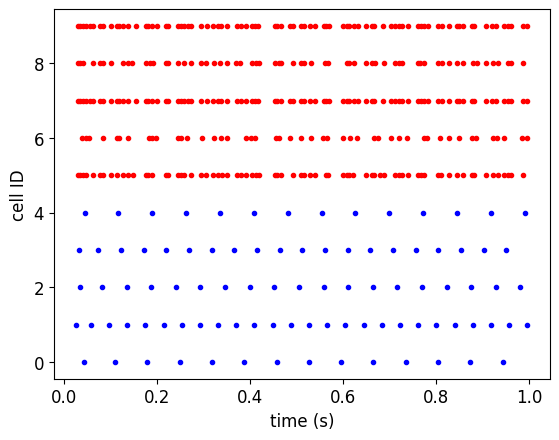

In [20]:
# Load the data from the file and plot the spike times
# using the pynml generate_plot utility function.
data_array_0 = np.loadtxt("%s.0.spikes.dat" % simulation_id)
data_array_1 = np.loadtxt("%s.1.spikes.dat" % simulation_id)
times_0 = data_array_0[:,1]
times_1 = data_array_1[:,1]
ids_0 = data_array_0[:,0]
ids_1 = [id+size0 for id in data_array_1[:,0]]
pynml.generate_plot(
    [times_0,times_1], [ids_0,ids_1],
    "Spike times", show_plot_already=False,
    save_figure_to="%s-spikes.png" % simulation_id,
    xaxis="time (s)", yaxis="cell ID",
    colors=['b','r'],
    linewidths=['0','0'], markers=['.','.'],
)